<a href="https://colab.research.google.com/github/Deanelle/Food-Footprint-Data-Analysis-/blob/main/Food_Footprints_The_Case_for_Reducing_MEAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [ ]:
#loading the csv file 
df=pd.read_csv('food-footprints.csv')

In [ ]:
#looking at the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              38 non-null     object 
 1   Code                                                0 non-null      float64
 2   Year                                                38 non-null     int64  
 3   GHG emissions per kilogram (Poore & Nemecek, 2018)  38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
#viewing the first five rows 
df.head()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30


In [ ]:
#viewing the last five rows 
df.tail()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
33,Soymilk,NaN,2010,0.98
34,Tofu (soybeans),NaN,2010,3.16
35,Tomatoes,NaN,2010,2.09
36,Wheat & Rye,NaN,2010,1.57
37,Wine,NaN,2010,1.79


In [ ]:
#looking at the descriptive statistics
df.describe()

,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
count,0.0,38.0,38.000000
mean,NaN,2010.0,10.023947
std,NaN,0.0,19.172390
min,NaN,2010.0,0.390000
25%,NaN,2010.0,0.980000
50%,NaN,2010.0,1.800000
75%,NaN,2010.0,8.570000
max,NaN,2010.0,99.480000


In [ ]:
#renaming the emissions column
df.rename(columns=({'GHG emissions per kilogram (Poore & Nemecek, 2018)':'GHG emissions per Kilogram'}),inplace=True,)

In [ ]:
df.drop('Code',axis=1, inplace=True)
df

,Entity,Year,GHG emissions per Kilogram
0,Apples,2010,0.43
1,Bananas,2010,0.86
2,Barley,2010,1.18
3,Beef (beef herd),2010,99.48
4,Beef (dairy herd),2010,33.30
5,Beet Sugar,2010,1.81
6,Berries & Grapes,2010,1.53
7,Brassicas,2010,0.51
8,Cane Sugar,2010,3.20
9,Cassava,2010,1.32


In [ ]:
#creating a boolean to see which columns have emissions above 10
over_10=df['GHG emissions per Kilogram']>10
over_10

0     False
1     False
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
Name: GHG emissions per Kilogram, dtype: bool

In [ ]:
#selecting the rows that gave a boolean above 10
df.iloc[[3,4,10,12,13,15,17,27,30]]

,Entity,Year,GHG emissions per Kilogram
3,Beef (beef herd),2010,99.48
4,Beef (dairy herd),2010,33.30
10,Cheese,2010,23.88
12,Coffee,2010,28.53
13,Dark Chocolate,2010,46.65
15,Fish (farmed),2010,13.63
17,Lamb & Mutton,2010,39.72
27,Pig Meat,2010,12.31
30,Prawns (farmed),2010,26.87


In [ ]:
df.sort_values(by='GHG emissions per Kilogram')

,Entity,Year,GHG emissions per Kilogram
11,Citrus Fruit,2010,0.39
0,Apples,2010,0.43
32,Root Vegetables,2010,0.43
20,Nuts,2010,0.43
28,Potatoes,2010,0.46
22,Onions & Leeks,2010,0.50
7,Brassicas,2010,0.51
25,Other Vegetables,2010,0.53
1,Bananas,2010,0.86
33,Soymilk,2010,0.98


In [ ]:
df2=pd.read_csv('land-use-per-kg-poore.csv')
df2

,Entity,Code,Year,"Land use per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.63
1,Bananas,NaN,2010,1.93
2,Barley,NaN,2010,1.11
3,Beef (beef herd),NaN,2010,326.21
4,Beef (dairy herd),NaN,2010,43.24
5,Beet Sugar,NaN,2010,1.83
6,Berries & Grapes,NaN,2010,2.41
7,Brassicas,NaN,2010,0.55
8,Cane Sugar,NaN,2010,2.04
9,Cassava,NaN,2010,1.81


In [ ]:
#merging the two dataframes
merged_df=pd.merge(df,df2)
merged_df

,Entity,Year,GHG emissions per Kilogram,Code,"Land use per kilogram (Poore & Nemecek, 2018)"
0,Apples,2010,0.43,NaN,0.63
1,Bananas,2010,0.86,NaN,1.93
2,Barley,2010,1.18,NaN,1.11
3,Beef (beef herd),2010,99.48,NaN,326.21
4,Beef (dairy herd),2010,33.30,NaN,43.24
5,Beet Sugar,2010,1.81,NaN,1.83
6,Berries & Grapes,2010,1.53,NaN,2.41
7,Brassicas,2010,0.51,NaN,0.55
8,Cane Sugar,2010,3.20,NaN,2.04
9,Cassava,2010,1.32,NaN,1.81


In [ ]:
#examining the data in the merged df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         38 non-null     object 
 1   Year                                           38 non-null     int64  
 2   GHG emissions per Kilogram                     38 non-null     float64
 3   Code                                           0 non-null      float64
 4   Land use per kilogram (Poore & Nemecek, 2018)  38 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
merged_df.drop('Code',axis=1,inplace=True)
merged_df

,Entity,Year,GHG emissions per Kilogram,"Land use per kilogram (Poore & Nemecek, 2018)"
0,Apples,2010,0.43,0.63
1,Bananas,2010,0.86,1.93
2,Barley,2010,1.18,1.11
3,Beef (beef herd),2010,99.48,326.21
4,Beef (dairy herd),2010,33.30,43.24
5,Beet Sugar,2010,1.81,1.83
6,Berries & Grapes,2010,1.53,2.41
7,Brassicas,2010,0.51,0.55
8,Cane Sugar,2010,3.20,2.04
9,Cassava,2010,1.32,1.81


In [ ]:
#renaming the land per use column
merged_df.rename(columns=({'Land use per kilogram (Poore & Nemecek, 2018)':'Land use per kilogram'}),inplace=True,)
merged_df

,Entity,Year,GHG emissions per Kilogram,Land use per kilogram
0,Apples,2010,0.43,0.63
1,Bananas,2010,0.86,1.93
2,Barley,2010,1.18,1.11
3,Beef (beef herd),2010,99.48,326.21
4,Beef (dairy herd),2010,33.30,43.24
5,Beet Sugar,2010,1.81,1.83
6,Berries & Grapes,2010,1.53,2.41
7,Brassicas,2010,0.51,0.55
8,Cane Sugar,2010,3.20,2.04
9,Cassava,2010,1.32,1.81


In [ ]:
merged_df.sort_values(['GHG emissions per Kilogram','Land use per kilogram'])

,Entity,Year,GHG emissions per Kilogram,Land use per kilogram
11,Citrus Fruit,2010,0.39,0.86
32,Root Vegetables,2010,0.43,0.33
0,Apples,2010,0.43,0.63
20,Nuts,2010,0.43,12.96
28,Potatoes,2010,0.46,0.88
22,Onions & Leeks,2010,0.50,0.39
7,Brassicas,2010,0.51,0.55
25,Other Vegetables,2010,0.53,0.38
1,Bananas,2010,0.86,1.93
33,Soymilk,2010,0.98,0.66


In [ ]:
#seeing if there is a correlation
merged_df[['GHG emissions per Kilogram','Land use per kilogram']].corr()

,GHG emissions per Kilogram,Land use per kilogram
GHG emissions per Kilogram,1.00000,0.79838
Land use per kilogram,0.79838,1.00000


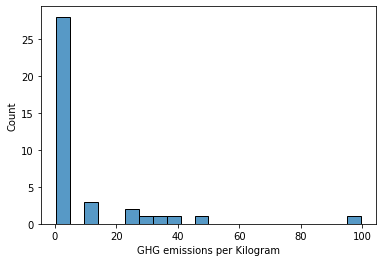

In [ ]:
# distribution of the emissions per kilogram
ax=sns.histplot(merged_df['GHG emissions per Kilogram'])

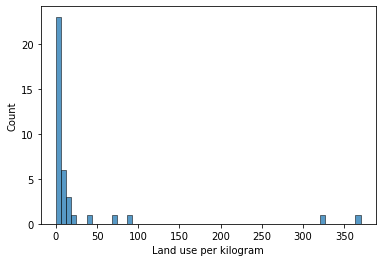

In [ ]:
#distribution of land per kilogram
ax=sns.histplot(merged_df['Land use per kilogram'])

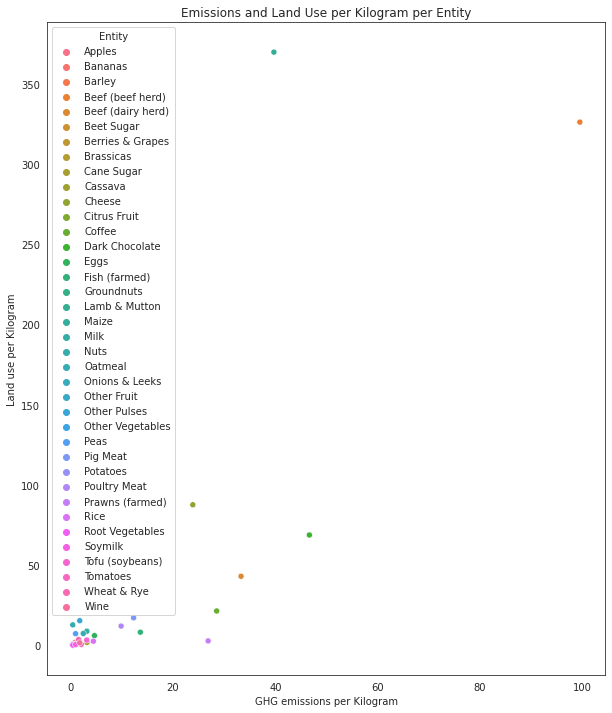

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,12))
sns.scatterplot(x='GHG emissions per Kilogram', y='Land use per kilogram',hue='Entity',data=merged_df)
plt.xlabel('GHG emissions per Kilogram')
plt.ylabel('Land use per Kilogram')
plt.title('Emissions and Land Use per Kilogram per Entity')
plt.show()

In [ ]:
fig=px.scatter(merged_df, x='GHG emissions per Kilogram',y= 'Land use per kilogram',color='Entity')
fig.show()

In [ ]:
fig=px.scatter(merged_df, x='Entity',y= 'GHG emissions per Kilogram')
fig.show()

In [ ]:
fig = px.bar(merged_df, x='Entity', y='GHG emissions per Kilogram')
fig.show()

In [ ]:
fig = px.bar(merged_df, x='Entity', y='Land use per kilogram')
fig.show()

In [ ]:
fig=px.pie(merged_df, values='Land use per kilogram',names='Entity',title='Land use per kilogram by Food type',width=1000, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig=px.pie(merged_df, values='GHG emissions per Kilogram',names='Entity',title='Emissions per kilogram by Food type',width=1000, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()